# Jupiter's Notebook for Scenario 09
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), [imbalanced-learn](https://imbalanced-learn.org/stable/), [XGBoost](https://pypi.org/project/xgboost/), and [dill](https://pypi.org/project/dill/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`<br>
`pip install xgboost`<br>
`pip install dill`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-09-Mixed-traffic.csv')

In [4]:
#No trunkated 
pd.set_option('display.max_columns', None)

In [5]:
#Dataset dimensions, number of sessions and features
df.shape

(358566, 52)

In [6]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 355088, 1: 3478})

In [7]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [8]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    358566
srcIP                  12400
srcPrt                 53815
dstIP                  11983
dstPrt                   308
flowduration          223246
total_fpackets           666
total_bpackets           881
total_fpktl            10528
total_bpktl            25793
min_fpktl                141
min_bpktl                498
max_fpktl               1264
max_bpktl               1151
mean_fpktl             24100
mean_bpktl             31041
std_fpktl              43237
std_bpktl              39214
total_fipt            117205
total_bipt             96196
min_fipt               58624
min_bipt               30995
max_fipt              113554
max_bipt               85989
mean_fipt             112569
mean_bipt              93577
std_fipt               94407
std_bipt               82924
fpsh_cnt                 133
bpsh_cnt                 384
furg_cnt                   1
burg_cnt                   1
total_fhlen             3468
total_bhlen   

In [10]:
# Delete time stamp (ts), srcIP and dstIP features
# Models do not learn with IP addresses
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

In [11]:
#Dataset dimensions, number of sessions and features
print(df.shape)

(358566, 49)


In [12]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(358566, 49)
(355872, 49)


In [13]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio,label
0,TCP,80,63745,5.183779,6,6,5844,400,54,60,1434,74,974.0,66.666664,712.628936,6.28225,5.183779,4.845996,0.000019,0.005220,2.492481,2.760535,1.036756,0.969199,0.903181,1.05536,4,0,0,0,120,184,1.157457,1.157457,2.314914,1.204527e+03,520.333333,674.817078,0.765498,0.670713,2,0,0,12,0,0,0,0.068446,0
1,TCP,80,57369,9.609721,2,2,108,120,54,60,54,60,54.0,60.000000,0.000000,0.00000,9.609721,9.593182,9.609721,9.593182,9.609721,9.593182,9.609721,9.593182,0.000000,0.00000,0,0,0,0,40,40,0.208123,0.208123,0.416245,2.372597e+01,57.000000,3.464102,6.406473,5.533872,2,0,0,4,0,0,0,1.111111,0
2,TCP,2491,80,0.000022,1,1,60,54,60,54,60,54,60.0,54.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0,20,20,45590.261719,45590.261719,91180.523438,5.197290e+06,57.000000,4.242640,0.000022,0.000000,1,0,0,2,0,0,0,0.900000,0
3,TCP,49273,80,0.000000,1,0,60,0,60,0,60,0,60.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0,20,0,0.000000,0.000000,0.000000,0.000000e+00,60.000000,0.000000,0.000000,0.000000,0,0,1,1,0,0,0,0.000000,0
4,TCP,49272,80,0.000000,1,0,60,0,60,0,60,0,60.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0,20,0,0.000000,0.000000,0.000000,0.000000e+00,60.000000,0.000000,0.000000,0.000000,0,0,1,1,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358561,UDP,47777,53,0.091271,1,1,76,92,76,92,76,92,76.0,92.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0,42,58,10.956391,10.956391,21.912783,1.840674e+03,84.000000,11.313708,0.091271,0.000000,0,0,0,0,0,0,0,1.210526,0
358562,UDP,59373,53,0.000438,1,1,76,422,76,422,76,422,76.0,422.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0,42,388,2283.235596,2283.235596,4566.471191,1.137051e+06,249.000000,244.658951,0.000438,0.000000,0,0,0,0,0,0,0,5.552631,0
358563,UDP,39263,53,0.000218,1,1,74,133,74,133,74,133,74.0,133.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0,40,99,4583.938965,4583.938965,9167.877930,9.488753e+05,103.500000,41.719299,0.000218,0.000000,0,0,0,0,0,0,0,1.797297,0
358564,UDP,48940,53,0.000221,1,1,74,166,74,166,74,166,74.0,166.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0,0,0,40,132,4524.599609,4524.599609,9049.199219,1.085904e+06,120.000000,65.053825,0.000221,0.000000,0,0,0,0,0,0,0,2.243243,0


In [14]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 352407 of 355872 (99.0%)
> Class 1 : 3465 of 355872 (1.0%)


# Create training and test dataset

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [16]:
#Original dataset dimensions
X_train.shape, X_test.shape

((284697, 48), (71175, 48))

# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [17]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [18]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
furg_cnt                int64
burg_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSe

In [19]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])
# fit on the trainning dataset
enc.fit_transform(X_train, y_train)
# Coding categorical variables of the trainning dataset
training_numeric_dataset=enc.transform(X_train)
# Coding categorical variables of the test dataset
testing_numeric_dataset = enc.transform(X_test)

In [20]:
#show trainning dataset
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
353960,0.002862,0.000000e+00,0.002744,0.057199,1,1,121,231,121,231,121,231,121.0,231.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,87,197,17.482822,17.482822,34.965645,6153.953613,176.0,77.781746,0.057199,0.000000,0,0,0,0,0,0,0,1.909091
118337,0.002862,2.420539e-05,0.002744,0.077188,1,1,83,450,83,450,83,450,83.0,450.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,49,416,12.955379,12.955379,25.910759,6905.217285,266.5,259.508179,0.077188,0.000000,0,0,0,0,0,0,0,5.421687
274760,0.002862,4.444159e-07,0.002744,0.227438,1,1,83,521,83,521,83,521,83.0,521.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,49,487,4.396799,4.396799,8.793597,2655.666260,302.0,309.712769,0.227438,0.000000,0,0,0,0,0,0,0,6.277109
209381,0.002862,8.918604e-06,0.002744,70.585213,8,8,688,1096,86,137,86,137,86.0,137.0,0.0,0.0,70.585074,70.585076,1.047966,1.048023,34.858891,34.858868,10.083582,10.083582,12.814854,12.814837,0,0,0,0,416,824,0.113338,0.113338,0.226676,25.274416,111.5,26.336287,4.705759,9.873886,0,0,0,0,0,0,0,1.593023
205785,0.002862,1.760734e-04,0.002744,0.217203,1,1,71,71,71,71,71,71,71.0,71.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,37,37,4.603985,4.603985,9.207970,653.765869,71.0,0.000000,0.217203,0.000000,0,0,0,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120522,0.002862,1.166920e-03,0.002744,14.498385,1,1,72,72,72,72,72,72,72.0,72.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,38,0.068973,0.068973,0.137946,9.932140,72.0,0.000000,14.498384,0.000000,0,0,0,0,0,0,0,1.000000
260997,0.002862,1.760734e-04,0.002744,19.672310,1,1,72,72,72,72,72,72,72.0,72.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,38,0.050833,0.050833,0.101666,7.319933,72.0,0.000000,19.672310,0.000000,0,0,0,0,0,0,0,1.000000
132717,0.002862,1.207953e-06,0.002744,4.953407,1,1,72,72,72,72,72,72,72.0,72.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,38,0.201881,0.201881,0.403763,29.070902,72.0,0.000000,4.953407,0.000000,0,0,0,0,0,0,0,1.000000
147777,0.002862,1.965788e-01,0.002744,0.000263,1,1,85,132,85,132,85,132,85.0,132.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,98,3802.632812,3802.632812,7605.265625,825171.312500,108.5,33.234020,0.000263,0.000000,0,0,0,0,0,0,0,1.552941


In [21]:
#show testing dataset
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
243418,0.002862,4.444159e-07,0.002744,30.027826,3,3,225,225,75,75,75,75,75.000000,75.00000,0.000000,0.000000,20.055181,0.000014,10.026143,0.000004,10.029037,0.000010,10.027590,0.000007,0.002047,0.000004,0,0,0,0,123,123,0.099907,0.099907,0.199815,1.498610e+01,75.000000,0.000000,6.005565,5.482346,0,0,0,0,0,0,0,1.000000
42915,0.039537,3.282861e-06,0.014272,11.900785,23,42,2059,51043,60,54,397,1434,89.521736,1215.30957,96.872867,488.038903,11.900775,11.900766,0.002380,0.000005,4.697329,4.704990,0.540944,0.290263,1.369545,1.045544,2,10,0,0,472,852,1.932646,3.529179,5.461824,4.462059e+03,816.953846,670.906616,0.259366,0.997683,2,2,0,64,0,0,0,24.790190
184830,0.002862,2.420539e-05,0.002744,0.000150,1,1,164,54,164,54,164,54,164.000000,54.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,130,20,6657.625488,6657.625488,13315.250977,1.451362e+06,109.000000,77.781746,0.000150,0.000000,0,0,0,0,0,0,0,0.329268
221457,0.002862,0.000000e+00,0.002744,0.097924,1,1,108,142,108,142,108,142,108.000000,142.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,74,108,10.212002,10.212002,20.424004,2.553000e+03,125.000000,24.041630,0.097924,0.000000,0,0,0,0,0,0,0,1.314815
310085,0.002862,4.444159e-07,0.002744,0.000311,1,1,82,174,82,174,82,174,82.000000,174.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,48,140,3214.026123,3214.026123,6428.052246,8.227907e+05,128.000000,65.053825,0.000311,0.000000,0,0,0,0,0,0,0,2.121951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108099,0.002862,1.760734e-04,0.002744,0.000243,1,1,70,162,70,162,70,162,70.000000,162.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,36,128,4116.098145,4116.098145,8232.196289,9.549348e+05,116.000000,65.053825,0.000243,0.000000,0,0,0,0,0,0,0,2.314286
223605,0.002862,2.212712e-08,0.002744,0.000182,1,1,82,133,82,133,82,133,82.000000,133.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,48,99,5497.122070,5497.122070,10994.244141,1.181881e+06,107.500000,36.062447,0.000182,0.000000,0,0,0,0,0,0,0,1.621951
243189,0.002862,6.551869e-05,0.002744,0.390120,1,1,71,71,71,71,71,71,71.000000,71.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,37,37,2.563314,2.563314,5.126627,3.639905e+02,71.000000,0.000000,0.390120,0.000000,0,0,0,0,0,0,0,1.000000
8428,0.039537,9.789355e-03,0.014272,5.445940,5,4,797,835,66,66,521,625,159.399994,208.75000,202.207318,277.557652,5.445940,5.322747,0.039858,0.002412,4.634124,5.043928,1.361485,1.774249,2.191251,2.834937,1,1,0,0,172,140,0.918115,0.734492,1.652607,2.996728e+02,181.333333,223.628601,1.244917,2.062226,1,2,0,8,0,0,0,1.047679


# Standardization and scaling of numerical variables

In [22]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [23]:
# fit on the trainning dataset
preprocessor.fit_transform(training_numeric_dataset)
X_train_stand = preprocessor.transform(training_numeric_dataset)
X_test_stand  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

### Re-generate the dataset as a dataframe

In [24]:
labels=list(training_numeric_dataset.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)

In [25]:
df_X_train_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.482556,-0.201175,-0.104955,-0.088053,-0.035367,-0.022384,-0.030606,-0.017519,1.739152,0.920548,-0.187004,-0.218857,0.695526,-0.064123,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.032170,-0.022533,-0.199515,-0.277737,-0.254581,-0.356798,-0.025627,-0.268446,-0.372283,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.235502
1,-0.482556,-0.200664,-0.104955,-0.087899,-0.035367,-0.022384,-0.032169,-0.017185,0.092616,2.987788,-0.400254,0.246721,-0.266529,0.659145,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.040150,0.001673,-0.199980,-0.278513,-0.255228,-0.356067,0.472081,0.662986,-0.369101,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,0.411731
2,-0.482556,-0.201166,-0.104955,-0.086743,-0.035367,-0.022384,-0.032169,-0.017077,0.092616,3.657989,-0.400254,0.397662,-0.266529,0.893629,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.040150,0.009521,-0.200858,-0.279979,-0.256450,-0.360201,0.667314,0.920308,-0.345177,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,0.569351
3,-0.482556,-0.200987,-0.104955,0.454612,0.001008,-0.006587,-0.007272,-0.016200,0.222606,0.033240,-0.383419,-0.418694,-0.190577,-0.374567,-0.385573,-0.407585,0.468900,0.627606,-0.031942,0.086293,2.256629,2.228405,1.036621,1.298455,2.514706,2.270158,-0.017434,-0.021851,0.0,0.0,0.036924,0.046771,-0.201298,-0.280712,-0.257062,-0.362760,-0.380347,-0.532128,0.367895,1.711114,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.293740
4,-0.482556,-0.197460,-0.104955,-0.086822,-0.035367,-0.022384,-0.032663,-0.017763,-0.427342,-0.589764,-0.467597,-0.559005,-0.570336,-0.592539,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.042670,-0.040218,-0.200837,-0.279943,-0.256420,-0.362148,-0.603078,-0.667114,-0.346806,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.403011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284692,-0.482556,-0.176555,-0.104955,0.023062,-0.035367,-0.022384,-0.032622,-0.017762,-0.384012,-0.580325,-0.461985,-0.556879,-0.545019,-0.589236,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.042460,-0.040108,-0.201303,-0.280720,-0.257068,-0.362775,-0.597579,-0.667114,1.927151,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.403011
284693,-0.482556,-0.197460,-0.104955,0.062872,-0.035367,-0.022384,-0.032622,-0.017762,-0.384012,-0.580325,-0.461985,-0.556879,-0.545019,-0.589236,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.042460,-0.040108,-0.201305,-0.280723,-0.257071,-0.362777,-0.597579,-0.667114,2.750982,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.403011
284694,-0.482556,-0.201149,-0.104955,-0.050380,-0.035367,-0.022384

In [26]:
df_X_test_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.482556,-0.201166,-0.104955,0.142550,-0.024974,-0.017871,-0.026326,-0.017529,-0.254023,-0.552006,-0.445149,-0.550501,-0.469067,-0.579328,-0.385573,-0.407585,0.079034,-0.069914,1.293771,-0.106105,0.421278,-0.234840,1.029438,-0.182097,-0.248251,-0.200469,-0.017434,-0.021851,0.0,0.0,-0.024609,-0.030713,-0.201299,-0.280715,-0.257064,-0.362770,-0.581080,-0.667114,0.574860,0.821339,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.403011
1,2.072299,-0.201106,0.068277,0.003075,0.078955,0.070139,0.049147,0.059977,-0.903971,-0.750235,1.361868,2.338632,-0.101417,3.186652,1.035133,2.096838,0.016118,0.047689,-0.186332,-0.106104,0.027174,0.097630,-0.187556,-0.139479,0.046637,0.001105,0.016962,0.058675,0.0,0.0,0.048685,0.049865,-0.201111,-0.280127,-0.256688,-0.358444,3.499321,2.771594,-0.340093,-0.087305,2.350962,1.854740,-0.156087,0.078031,0.0,-0.010712,-0.011401,3.980581
2,-0.482556,-0.200664,-0.104955,-0.088492,-0.035367,-0.022384,-0.028836,-0.017789,3.602337,-0.750235,0.054306,-0.595145,1.784168,-0.648683,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.023139,-0.042097,0.482274,0.859589,0.693868,1.049014,-0.394096,-0.268446,-0.381367,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.526601
3,-0.482556,-0.201175,-0.104955,-0.087740,-0.035367,-0.022384,-0.031141,-0.017655,1.175864,0.080437,-0.259958,-0.408064,0.366402,-0.358054,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.034900,-0.032371,-0.200261,-0.278983,-0.255619,-0.360301,-0.306104,-0.543889,-0.365799,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.345003
4,-0.482556,-0.201166,-0.104955,-0.088491,-0.035367,-0.022384,-0.032211,-0.017606,0.049286,0.382499,-0.405866,-0.340034,-0.291846,-0.252371,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.040360,-0.028834,0.128696,0.269768,0.202000,0.437577,-0.289605,-0.333682,-0.381341,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.196280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,-0.482556,-0.197460,-0.104955,-0.088491,-0.035367,-0.022384,-0.032704,-0.017625,-0.470672,0.269226,-0.473209,-0.365545,-0.595653,-0.292003,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.042880,-0.030160,0.221318,0.424275,0.330848,0.566119,-0.355599,-0.333682,-0.381352,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.160840
71171,-0.482556,-0.201174,-0.104955,-0.088492,-0.035367,-0.022384,-0.032211,-0.017669,0.049286,-0.004518,-0.405866,-0.427197,-0.291846,-0.387778,-0.385573,-0.407585,-0.075703,-0.069914,-0.186684,-0.106105,-0.320040,-0.234840,-0.256951,-0.182098,-0.248692,-0.200470,-0.017434,-0.021851,0.0,0.0,-0.040360,-0.033365,0.363118,0.660817,0.528107,0.786879,-0.402345,-0.482277,-0.381362,-0.289446,-0.422227,-0.447683,-0.156087,-0.023925,0.0,-0.010712,-0.011401,-0.288410
71172,-0.482556,-0.199793,-0.104955,-0.085491,-0.035367,-0.022384,-0.032663,-0.017763,-0.

# Feature selection
`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. Defining and Fiting Threshold
For quasi-constant features, that have the same value for a very large subset, i.e. using threshold as 0.01 would mean dropping the column where 99% of the values are similar.

In [27]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #.25 would mean dropping the column where 75% of the values are similar.
# fit on the trainning dataset
var_thr.fit(df_X_train_stand)
# Get a mask of the selected features 
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [28]:
#Show features that do not meet the threshold
concol = [column for column in df_X_train_stand.columns 
          if column not in df_X_train_stand.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg


In [29]:
#Dropping Low Variance Columns:
df_X_train_stand.drop(concol,axis=1,inplace=True)
df_X_test_stand.drop(concol,axis=1,inplace=True)

In [30]:
#Show selected features
df_X_train_stand.columns

Index(['proto', 'srcPrt', 'dstPrt', 'flowduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fipt', 'total_bipt', 'min_fipt',
       'min_bipt', 'max_fipt', 'max_bipt', 'mean_fipt', 'mean_bipt',
       'std_fipt', 'std_bipt', 'fpsh_cnt', 'bpsh_cnt', 'total_fhlen',
       'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl', 'mean_flowipt',
       'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack',
       'flow_cwr', 'flow_ece', 'downUpRatio'],
      dtype='object')

In [31]:
##final dataset dimensions
df_X_train_stand.shape,df_X_test_stand.shape

((284697, 45), (71175, 45))

# Create Machine Learning Models

### a) Weighted Logistic Regression (W-LR)

In [32]:
#Run grid search only on training set using cross-validation
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model1=GridSearchCV(LogisticRegression(class_weight='balanced', solver='saga' ,max_iter=1000),parameters,cv=5, verbose=3)

In [33]:
# fit on the trainning dataset
model1.fit(df_X_train_stand,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.978 total time= 3.2min
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.978 total time= 3.4min
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.978 total time= 3.4min
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.979 total time= 3.4min
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.978 total time= 3.4min
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.981 total time= 2.6min
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.979 total time= 2.2min
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.980 total time= 2.3min
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.981 total time= 1.5min
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.980 total time= 2.2min
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.983 total time= 3.4min
[CV 2/5] END ................C=0.01, penalty=l1;

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [36]:
print("tuned hpyerparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.9837792498165374


In [37]:
y_pred1 = model1.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99     70497
     class 1       0.29      0.79      0.43       678

    accuracy                           0.98     71175
   macro avg       0.65      0.89      0.71     71175
weighted avg       0.99      0.98      0.98     71175



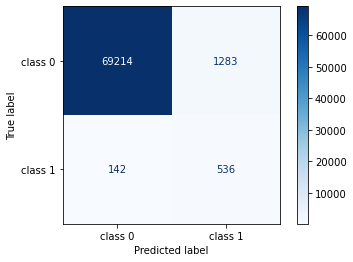

In [38]:
#performance results
print(classification_report(y_test, y_pred1, target_names=target_names))
plot_confusion_matrix(model1, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

  ## Over-sampling with SMOTE

In [40]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit on the trainning dataset
X_smote , y_smote = smote.fit_resample(df_X_train_stand, y_train)

print('Origianl dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 281910, 1: 2787})
Resample dataset shape: Counter({0: 281910, 1: 281910})


### b) Logistic Regression with Synthetic minority over-sampling technique (LR+SMOTE)

In [41]:
#Run grid search only on training set using cross-validation
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model2=GridSearchCV(LogisticRegression(solver='saga' ,max_iter=1000),parameters,cv=5, verbose=3)
model2.fit(X_smote,y_smote)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.978 total time= 7.1min
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.977 total time= 7.2min
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.977 total time= 7.5min
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.978 total time= 7.6min
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.978 total time= 8.3min
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.980 total time= 6.9min
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.979 total time= 6.0min
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.979 total time= 5.3min
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.980 total time= 3.5min
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.980 total time= 5.5min
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.986 total time= 8.3min
[CV 2/5] END ................C=0.01, penalty=l1;

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [42]:
print("tuned hpyerparameters :(best parameters) ",model2.best_params_)
print("accuracy :",model2.best_score_)
print('Best Model:',model2.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.9866872406087049
Best Model: LogisticRegression(C=10.0, max_iter=1000, penalty='l1', solver='saga')


In [43]:
y_pred2=model2.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99     70497
     class 1       0.35      0.83      0.49       678

    accuracy                           0.98     71175
   macro avg       0.67      0.91      0.74     71175
weighted avg       0.99      0.98      0.99     71175



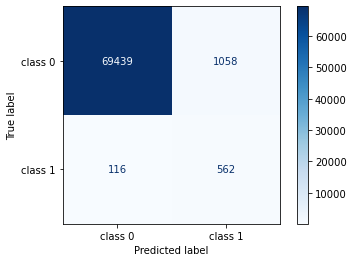

In [44]:
#performance results
print(classification_report(y_test, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Decision Tree (W-SVM)

In [45]:
#Run grid search only on training set using cross-validation
parameters = {'criterion':['gini','entropy'], 'max_depth' : [2,4,6,8,10,12]}
model3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters, cv=5, verbose=3)
# fit on the trainning dataset
model3.fit(df_X_train_stand, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.964 total time=   0.9s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.966 total time=   0.9s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.966 total time=   0.4s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.967 total time=   0.4s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.965 total time=   0.4s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.993 total time=   0.9s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.994 total time=   0.9s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.993 total time=   0.6s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.994 total time=   0.6s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.994 total time=   0.6s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.995 total time=   1.0s
[CV 2/5] END .......criterion=gini, max_depth=6;

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=3)

In [46]:
print("tuned hpyerparameters :(best parameters) ",model3.best_params_)
print("accuracy :",model3.best_score_)
print('Best Model:',model3.best_estimator_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10}
accuracy : 0.9998770622185514
Best Model: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10)


In [47]:
y_pred3 = model3.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     70497
     class 1       0.98      0.52      0.68       678

    accuracy                           1.00     71175
   macro avg       0.99      0.76      0.84     71175
weighted avg       1.00      1.00      0.99     71175



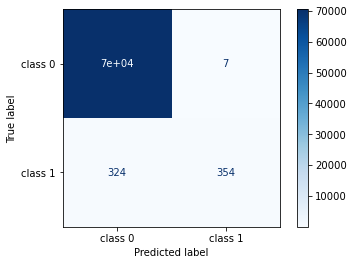

In [48]:
#performance results
print(classification_report(y_test, y_pred3, target_names=target_names))
plot_confusion_matrix(model3, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

## Undersampling using OSS
OneSidedSelection (OSS) is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. 

In [50]:
# Import library
from imblearn.under_sampling import OneSidedSelection

In [51]:
# define the undersampling method
oss = OneSidedSelection(random_state=0)
# fit on the trainning dataset
X_oss, y_oss = oss.fit_resample(df_X_train_stand, y_train)
# summarize the new class distribution
counter = Counter(y_oss)
print(counter)

Counter({0: 278462, 1: 2787})


### d) Weighted Support Vector Machine with One Sided Selection (SVM+OSS)

In [52]:
#Run grid search only on training set using cross-validation
parameters = {'C':[1, 5, 10] }
model4 = GridSearchCV(SVC(class_weight='balanced', kernel='rbf'), parameters, cv=5, verbose=3)
model4.fit(X_oss, y_oss)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...............................C=1;, score=0.998 total time= 4.5min
[CV 2/5] END ...............................C=1;, score=0.998 total time=29.6min
[CV 3/5] END ...............................C=1;, score=0.998 total time= 5.6min
[CV 4/5] END ...............................C=1;, score=0.998 total time= 3.4min
[CV 5/5] END ...............................C=1;, score=0.998 total time=23.2min
[CV 1/5] END ...............................C=5;, score=0.999 total time= 2.5min
[CV 2/5] END ...............................C=5;, score=0.998 total time= 2.9min
[CV 3/5] END ...............................C=5;, score=0.999 total time= 3.5min
[CV 4/5] END ...............................C=5;, score=0.999 total time= 3.2min
[CV 5/5] END ...............................C=5;, score=0.999 total time= 2.1min
[CV 1/5] END ..............................C=10;, score=0.999 total time= 1.6min
[CV 2/5] END ..............................C=10;,

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 5, 10]}, verbose=3)

In [53]:
print("tuned hpyerparameters :(best parameters) ",model4.best_params_)
print("accuracy :",model4.best_score_)
print('Best Model:',model4.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 10}
accuracy : 0.9988444397036196
Best Model: SVC(C=10, class_weight='balanced')


In [54]:
y_pred4 = model4.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     70497
     class 1       0.93      0.97      0.95       678

    accuracy                           1.00     71175
   macro avg       0.97      0.99      0.98     71175
weighted avg       1.00      1.00      1.00     71175



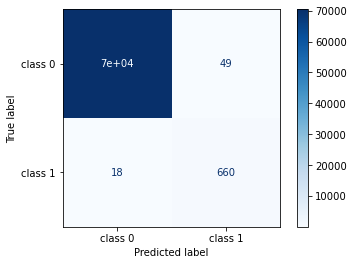

In [55]:
#performance results
print(classification_report(y_test, y_pred4, target_names=target_names))
plot_confusion_matrix(model4, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

### e)  XG Boost, Extreme Gradient Boosting (XGB)

In [57]:
#Run grid search only on training set using cross-validation
parameters = {'max_depth': [5, 10],'n_estimators': [100, 150], 'learning_rate': [0.1, 0.2]}
model5 = GridSearchCV(XGBClassifier(eval_metric='logloss',use_label_encoder =False), parameters, cv=5, verbose=3)
model5.fit(df_X_train_stand, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   4.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   4.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   3.9s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   4.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   4.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   5.8s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   5.6s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   5.5s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   5.7s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total tim

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=

In [58]:
print("tuned hpyerparameters :(best parameters) ",model5.best_params_)
print("accuracy :",model5.best_score_)
print('Best Model:',model5.best_estimator_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
accuracy : 0.9999473123441287
Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=32,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [59]:
y_pred5 = model5.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     70497
     class 1       1.00      0.53      0.69       678

    accuracy                           1.00     71175
   macro avg       1.00      0.76      0.84     71175
weighted avg       1.00      1.00      0.99     71175



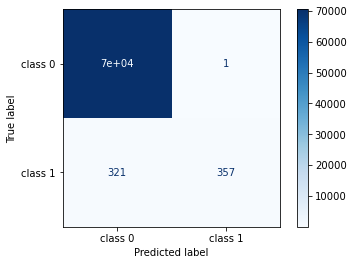

In [61]:
#performance results
print(classification_report(y_test, y_pred5, target_names=target_names))
plot_confusion_matrix(model5, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

In [62]:
#save notebook session
import dill
dill.dump_session('session_esc-09.db')
#to restore a notebook session
#dill.load_session('session_esc-09.db')